# Domain Adaptation

Specral resolving power of Ondrejov and LAMOST spectra is different.
Data from Ondrejov have much more details.
For example more double peak spectra can be observed.
In order to classify LAMOST spectra using Ondrejov as training set
[Gaussian blur](https://en.wikipedia.org/wiki/Gaussian_blur) will be applied.
This is also called transfer learning.

## Readings

http://sebastianruder.com/transfer-learning/

## Previous Work

For inspiration Gaussian blur (astropy.convolution)
https://github.com/palicand/vocloud_spark_import/blob/master/vocloud_spark_preprocess/preprocess_data.py#L60.

## Transfer Learning

TODO

##  Gaussian Blur

TODO

In [39]:
import astropy.io.fits as fits
import astropy.wcs
from astropy.convolution import convolve, Gaussian1DKernel
import matplotlib.pyplot as plt
%matplotlib nbagg

0.23091817259851


<IPython.core.display.Javascript object>


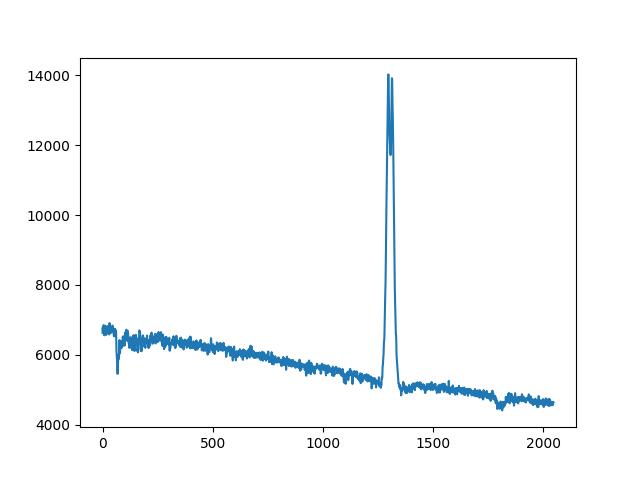

In [40]:
with fits.open('samples/bt-cmi-ondrejov.fits') as hdulist:
    ondrejov_header = hdulist[0].header
    print(ondrejov_header['CDELT1'])
    ondrejov_data = hdulist[0].data
    wcs = astropy.wcs.WCS(ondrejov_header)
    ondrejov_wave = wcs.wcs_pix2world(range(ondrejov_header['NAXIS1']), 0)[0]
    plt.plot(ondrejov_data)

<IPython.core.display.Javascript object>


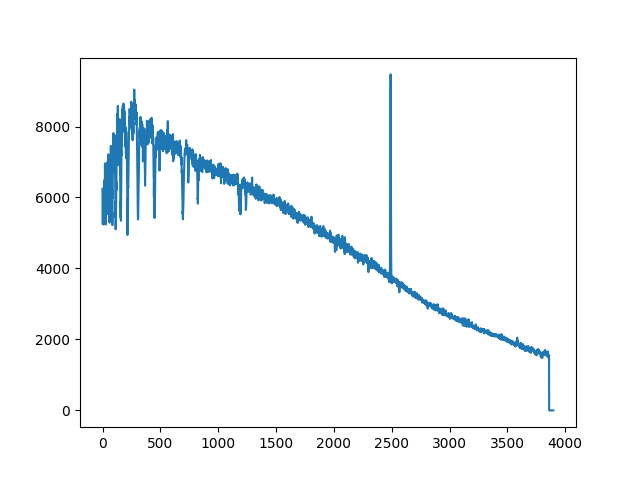

In [41]:
with fits.open('samples/bt-cmi-lamost.fits') as hdulist:
    lamost_header = hdulist[0].header
    lamost_data = hdulist[0].data
    plt.plot(lamost_data[0, :])

In [42]:
start = lamost_header['CRVAL1']
delta = lamost_header['CD1_1']
pix = lamost_header['CRPIX1']
lamost_wave = [10 ** (start + (i - pix + 1) * delta) for i in range(lamost_header['NAXIS1'])]
lamost_wave[1] - lamost_wave[0], lamost_wave[2] - lamost_wave[1]

(0.8520511945644103, 0.8522474091878394)

<IPython.core.display.Javascript object>


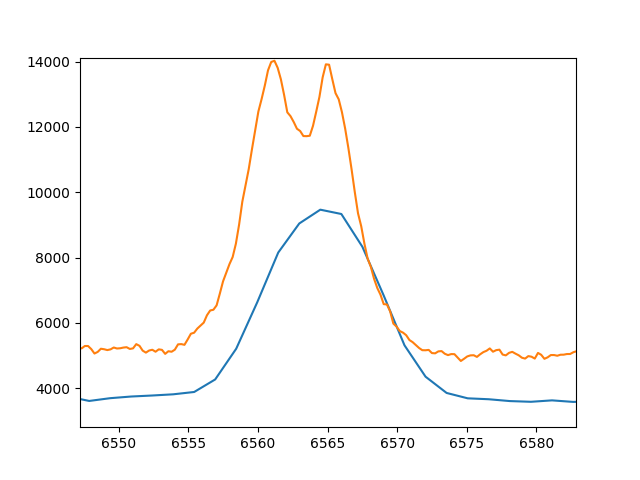

In [43]:
plt.plot(lamost_wave, lamost_data[0, :])
plt.plot(ondrejov_wave, ondrejov_data)

<IPython.core.display.Javascript object>


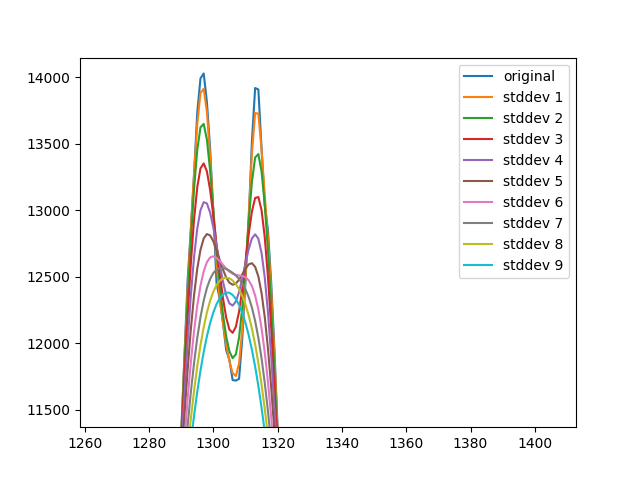

In [44]:
plt.plot(ondrejov_data, label='original')
for stddev in range(1, 10):
    gauss = Gaussian1DKernel(stddev)
    plt.plot(convolve(ondrejov_data, gauss, boundary='extend'), label='stddev ' + str(stddev))
plt.legend()

<IPython.core.display.Javascript object>


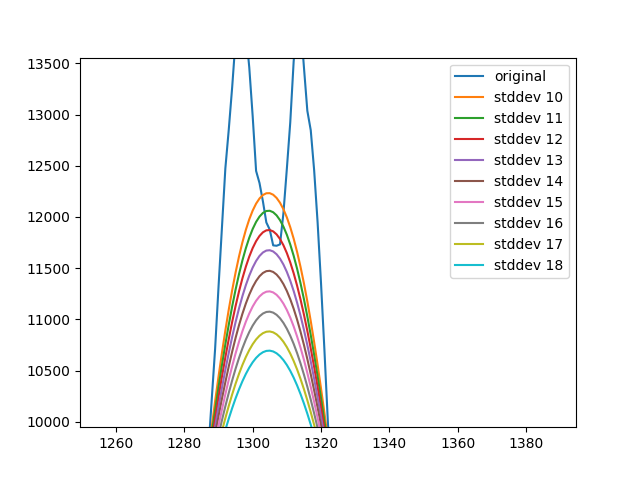

In [38]:
plt.plot(ondrejov_data, label='original')
for stddev in range(10, 19):
    gauss = Gaussian1DKernel(stddev)
    plt.plot(convolve(ondrejov_data, gauss, boundary='extend'), label='stddev ' + str(stddev))
plt.legend()

<IPython.core.display.Javascript object>


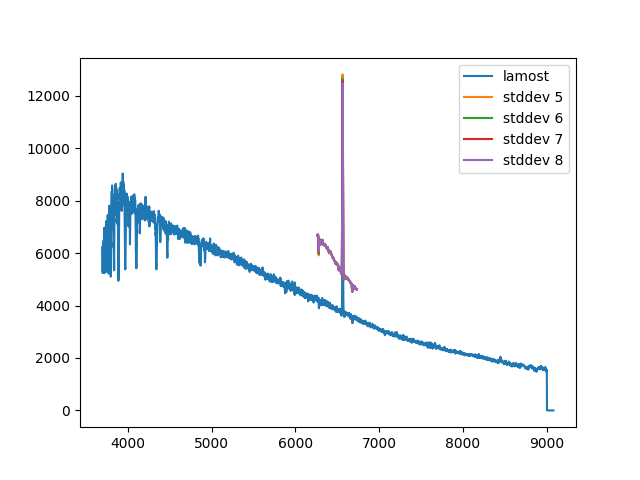

In [45]:
plt.plot(lamost_wave, lamost_data[0, :], label='lamost')
for stddev in range(5, 9):
    gauss = Gaussian1DKernel(stddev)
    plt.plot(ondrejov_wave, convolve(ondrejov_data, gauss, boundary='extend'), label='stddev ' + str(stddev))
plt.legend()